In [1]:
# import packages
from astropy.io import fits
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from lmfit import Model#, minimize, Parameters, fit_report
# from lmfit.models import LinearModel

import os
import warnings
warnings.filterwarnings('ignore')

"""
"""

# path joining version for other paths
notebook_path = os.path.abspath('h3p_int_vel_generate.ipynb' + "/../")
filepath = os.path.join(os.path.dirname(notebook_path), 'spec/')

# count number of fits files in folder
filesize = len([name for name in os.listdir(filepath) if os.path.isfile(os.path.join(filepath, name))])

# set fits index to begin and end
index0 = 22
index1 = 112

# load fits data
order36_data_list = []
order32_data_list = []
order37_data_list = []
order35_data_list = []
order34_data_list = []

for i in range(filesize):
    n = i + index0
    if n>= index0 and n < 10:
        hdu_data_order36 = fits.getdata(filepath + 'order36/new_frame/jun02s000' + '{}_order36.fits'.format(n), ext=0)
        order36_data_list.append(hdu_data_order36)
        hdu_data_order32 = fits.getdata(filepath + 'order32/new_frame/jun02s000' + '{}_order32.fits'.format(n), ext=0)
        order32_data_list.append(hdu_data_order32)
        hdu_data_order37 = fits.getdata(filepath + 'order37/new_frame/jun02s000' + '{}_order37.fits'.format(n), ext=0)
        order37_data_list.append(hdu_data_order37)
        hdu_data_order35 = fits.getdata(filepath + 'order35/new_frame/jun02s000' + '{}_order35.fits'.format(n), ext=0)
        order35_data_list.append(hdu_data_order35)
        hdu_data_order34 = fits.getdata(filepath + 'order34/new_frame/jun02s000' + '{}_order34.fits'.format(n), ext=0)
        order34_data_list.append(hdu_data_order34)
    elif n>= 10 and n < 100:
        hdu_data_order36 = fits.getdata(filepath + 'order36/new_frame/jun02s00' + '{}_order36.fits'.format(n), ext=0)
        order36_data_list.append(hdu_data_order36)
        hdu_data_order32 = fits.getdata(filepath + 'order32/new_frame/jun02s00' + '{}_order32.fits'.format(n), ext=0)
        order32_data_list.append(hdu_data_order32)
        hdu_data_order37 = fits.getdata(filepath + 'order37/new_frame/jun02s00' + '{}_order37.fits'.format(n), ext=0)
        order37_data_list.append(hdu_data_order37)
        hdu_data_order35 = fits.getdata(filepath + 'order35/new_frame/jun02s00' + '{}_order35.fits'.format(n), ext=0)
        order35_data_list.append(hdu_data_order35)
        hdu_data_order34 = fits.getdata(filepath + 'order34/new_frame/jun02s00' + '{}_order34.fits'.format(n), ext=0)
        order34_data_list.append(hdu_data_order34)
    elif n >= 100 and n < index1:
        hdu_data_order36 = fits.getdata(filepath + 'order36/new_frame/jun02s0' + '{}_order36.fits'.format(n), ext=0)
        order36_data_list.append(hdu_data_order36)
        hdu_data_order32 = fits.getdata(filepath + 'order32/new_frame/jun02s0' + '{}_order32.fits'.format(n), ext=0)
        order32_data_list.append(hdu_data_order32)
        hdu_data_order37 = fits.getdata(filepath + 'order37/new_frame/jun02s0' + '{}_order37.fits'.format(n), ext=0)
        order37_data_list.append(hdu_data_order37)
        hdu_data_order35 = fits.getdata(filepath + 'order35/new_frame/jun02s0' + '{}_order35.fits'.format(n), ext=0)
        order35_data_list.append(hdu_data_order35)
        hdu_data_order34 = fits.getdata(filepath + 'order34/new_frame/jun02s0' + '{}_order34.fits'.format(n), ext=0)
        order34_data_list.append(hdu_data_order34)
    elif n >= index1:
        break
order36_data = np.array(order36_data_list)
order32_data = np.array(order32_data_list)
order37_data = np.array(order37_data_list)
order35_data = np.array(order35_data_list)
order34_data = np.array(order34_data_list)

# load waverange
waverange36 = fits.open(filepath + 'order36/' + 'waverange.fits', ignore_missing_end=True)[0].data
waverange32 = fits.open(filepath + 'order32/' + 'waverange.fits', ignore_missing_end=True)[0].data
waverange37 = fits.open(filepath + 'order37/' + 'waverange.fits', ignore_missing_end=True)[0].data
waverange35 = fits.open(filepath + 'order35/' + 'waverange.fits', ignore_missing_end=True)[0].data
waverange34 = fits.open(filepath + 'order34/' + 'waverange.fits', ignore_missing_end=True)[0].data

# load spectral resolution
R36 = 73194.84858495607
R32 = 72803.45487481622
R37 = 72736.04543958924
R35 = 73234.23454151815
R34 = 72543.25347866818
R = np.mean((R36,R32,R37,R35,R34))

# obtain average flat field
avg_flat_order36 = np.mean((order36_data[32-index0], 
                              order36_data[33-index0], 
                              order36_data[34-index0], 
                              order36_data[35-index0], 
                              order36_data[36-index0], 
                              order36_data[37-index0], 
                              order36_data[38-index0], 
                              order36_data[39-index0], 
                              order36_data[40-index0], 
                              order36_data[41-index0],), axis=0)

avg_flat_order32 = np.mean((order32_data[32-index0], 
                              order32_data[33-index0], 
                              order32_data[34-index0], 
                              order32_data[35-index0], 
                              order32_data[36-index0], 
                              order32_data[37-index0], 
                              order32_data[38-index0], 
                              order32_data[39-index0], 
                              order32_data[40-index0], 
                              order32_data[41-index0],), axis=0)

avg_flat_order37 = np.mean((order37_data[32-index0], 
                              order37_data[33-index0], 
                              order37_data[34-index0], 
                              order37_data[35-index0], 
                              order37_data[36-index0], 
                              order37_data[37-index0], 
                              order37_data[38-index0], 
                              order37_data[39-index0], 
                              order37_data[40-index0], 
                              order37_data[41-index0],), axis=0)

avg_flat_order35 = np.mean((order35_data[32-index0], 
                              order35_data[33-index0], 
                              order35_data[34-index0], 
                              order35_data[35-index0], 
                              order35_data[36-index0], 
                              order35_data[37-index0], 
                              order35_data[38-index0], 
                              order35_data[39-index0], 
                              order35_data[40-index0], 
                              order35_data[41-index0],), axis=0)

avg_flat_order34 = np.mean((order34_data[32-index0], 
                              order34_data[33-index0], 
                              order34_data[34-index0], 
                              order34_data[35-index0], 
                              order34_data[36-index0], 
                              order34_data[37-index0], 
                              order34_data[38-index0], 
                              order34_data[39-index0], 
                              order34_data[40-index0], 
                              order34_data[41-index0],), axis=0)

# obtain average flat lamp off
avg_dark_order36 = np.mean((order36_data[22-index0], 
                                 order36_data[23-index0], 
                                 order36_data[24-index0],
                                 order36_data[25-index0], 
                                 order36_data[26-index0], 
                                 order36_data[27-index0], 
                                 order36_data[28-index0], 
                                 order36_data[29-index0], 
                                 order36_data[30-index0], 
                                 order36_data[31-index0],), axis=0)

avg_dark_order32 = np.mean((order32_data[22-index0], 
                                 order32_data[23-index0], 
                                 order32_data[24-index0],
                                 order32_data[25-index0], 
                                 order32_data[26-index0], 
                                 order32_data[27-index0], 
                                 order32_data[28-index0], 
                                 order32_data[29-index0], 
                                 order32_data[30-index0], 
                                 order32_data[31-index0],), axis=0)

avg_dark_order37 = np.mean((order37_data[22-index0], 
                                 order37_data[23-index0], 
                                 order37_data[24-index0],
                                 order37_data[25-index0], 
                                 order37_data[26-index0], 
                                 order37_data[27-index0], 
                                 order37_data[28-index0], 
                                 order37_data[29-index0], 
                                 order37_data[30-index0], 
                                 order37_data[31-index0],), axis=0)

avg_dark_order35 = np.mean((order35_data[22-index0], 
                                 order35_data[23-index0], 
                                 order35_data[24-index0],
                                 order35_data[25-index0], 
                                 order35_data[26-index0], 
                                 order35_data[27-index0], 
                                 order35_data[28-index0], 
                                 order35_data[29-index0], 
                                 order35_data[30-index0], 
                                 order35_data[31-index0],), axis=0)

avg_dark_order34 = np.mean((order34_data[22-index0], 
                                 order34_data[23-index0], 
                                 order34_data[24-index0],
                                 order34_data[25-index0], 
                                 order34_data[26-index0], 
                                 order34_data[27-index0], 
                                 order34_data[28-index0], 
                                 order34_data[29-index0], 
                                 order34_data[30-index0], 
                                 order34_data[31-index0],), axis=0)

# define normalization function
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# define guassian function, credit to pen and pants IDL's Gaussfit in Python
def gaussian_fit(x, a0, a1, a2, a3, a4, a5): 
    """
    x = data array
    a0 = height of guassian
    a1 = pixel position of Gaussian peak
    a2 = width of Gaussian
    a3 = constant term
    a4 = linear term
    a5 = quadratic term
    
    note: fwhm = a2 * np.sqrt(2 * np.log(2)) * 2
    """
    z = (x - a1) / a2
    y = a0 * np.exp(-z**2 / a2) + a3 + a4 * x + a5 * x**2
    return y

# convert observation time (UTC) to seconds 
def fits_header_utc_to_second(fn):
    # fn = frame_number
    if fn >= 0 and fn < 10:
        hdu_header = fits.open(filepath + 'jun02s000' + '{}.fits'.format(fn), ignore_missing_end=True)[0].header
    elif fn >= 10 and fn < 100:
        hdu_header = fits.open(filepath + 'jun02s00' + '{}.fits'.format(fn), ignore_missing_end=True)[0].header
    elif fn >= 100 and fn < index1:
        hdu_header = fits.open(filepath + 'jun02s0' + '{}.fits'.format(fn), ignore_missing_end=True)[0].header
    elif fn >= index1:
        pass
    
    h = float(hdu_header['UTC'].split(':')[0])
    m = float(hdu_header['UTC'].split(':')[1])
    s = float(hdu_header['UTC'].split(':')[2])
    
    seconds = h * 3600 + m * 60 + s
    return seconds

# scale the sky frame using the equation on page 9 of Stallard_et_al_2019
def scale_sky_frame(data, fn_spec):
    """
    confirmed sky frames: 51, 59, 60, 72, 78, 79, 91, 103
    """
    if fn_spec >=0 and fn_spec < 51:
        fn_sky1 = 51
        fn_sky2 = 59
    elif fn_spec > 51 and fn_spec < 60:
        fn_sky1 = 51 # frame number of sky1
        fn_sky2 = 59 # frame number of sky2
    elif fn_spec > 60 and fn_spec < 72:
        fn_sky1 = 60
        fn_sky2 = 72
    elif fn_spec > 72 and fn_spec < 78:
        fn_sky1 = 72
        fn_sky2 = 78
    elif fn_spec > 78 and fn_spec < 91:
        fn_sky1 = 79
        fn_sky2 = 91
    elif fn_spec > 91 and fn_spec < 103:
        fn_sky1 = 91
        fn_sky2 = 103
    elif fn_spec > 103:
        fn_sky1 = 91
        fn_sky2 = 103

    sky1 = data[fn_sky1-index0]
    sky2 = data[fn_sky2-index0]

    t1 = fits_header_utc_to_second(fn_sky1) 
    t2 = fits_header_utc_to_second(fn_sky2)
    td = fits_header_utc_to_second(fn_spec)

    sky_final = sky1 * ((t2 - td) / (t2 - t1)) + sky2 * ((td - t1) / (t2 - t1))
    return sky_final

# reduce fits for different orders and collect
# order36
spec36_reducelist = []

for i in range(60, 104):
    sky_frame = (51, 59, 60, 72, 78, 79, 91, 103)
    
    if i in sky_frame:
        continue
    elif i not in sky_frame:
        skyframe36 = scale_sky_frame(order36_data, i)
    
        reduce_spec36 = (order36_data[i-index0] - skyframe36) / (avg_flat_order36 - avg_dark_order36)
        reduce_spec36[reduce_spec36<0] = 0
    
        spec36_reducelist.append(reduce_spec36)
spec36_reduced = np.array(spec36_reducelist)
spec36_stacked = np.sum((spec36_reduced), axis=0)

# order32
spec32_reducelist = []

for i in range(60, 104):
    sky_frame = (51, 59, 60, 72, 78, 79, 91, 103)
    
    if i in sky_frame:
        continue
    elif i not in sky_frame:
        skyframe32 = scale_sky_frame(order32_data, i)
    
        reduce_spec32 = (order32_data[i-index0] - skyframe32) / (avg_flat_order32 - avg_dark_order32)
        reduce_spec32[reduce_spec32<0] = 0
        reduce_spec32 = np.vstack((reduce_spec32, np.zeros((9, 1024))))
    
        spec32_reducelist.append(reduce_spec32)
spec32_reduced = np.array(spec32_reducelist)
spec32_stacked = np.sum((spec32_reduced), axis=0)

# order37
spec37_reducelist = []

for i in range(60, 104):
    sky_frame = (51, 59, 60, 72, 78, 79, 91, 103)
    
    if i in sky_frame:
        continue
    elif i not in sky_frame:
        skyframe37 = scale_sky_frame(order37_data, i)
    
        reduce_spec37 = (order37_data[i-index0] - skyframe37) / (avg_flat_order37 - avg_dark_order37)
        reduce_spec37[reduce_spec37<0] = 0
        reduce_spec37 = np.vstack((reduce_spec37, np.zeros((7, 1024))))
    
        spec37_reducelist.append(reduce_spec37)
spec37_reduced = np.array(spec37_reducelist)
spec37_stacked = np.sum((spec37_reduced), axis=0)

# order35
spec35_reducelist = []

for i in range(60, 104):
    sky_frame = (51, 59, 60, 72, 78, 79, 91, 103)
    
    if i in sky_frame:
        continue
    elif i not in sky_frame:
        skyframe35 = scale_sky_frame(order35_data, i)
    
        reduce_spec35 = (order35_data[i-index0] - skyframe35) / (avg_flat_order35 - avg_dark_order35)
        reduce_spec35[reduce_spec35<0] = 0
        reduce_spec35 = np.delete(reduce_spec35, np.s_[:8], 0)
    
        spec35_reducelist.append(reduce_spec35)
spec35_reduced = np.array(spec35_reducelist)
spec35_stacked = np.sum((spec35_reduced), axis=0)

# order34
spec34_reducelist = []

for i in range(60, 104):
    sky_frame = (51, 59, 60, 72, 78, 79, 91, 103)
    
    if i in sky_frame:
        continue
    elif i not in sky_frame:
        skyframe34 = scale_sky_frame(order34_data, i)
    
        reduce_spec34 = (order34_data[i-index0] - skyframe34) / (avg_flat_order34 - avg_dark_order34)
        reduce_spec34[reduce_spec34<0] = 0
        reduce_spec34 = np.vstack((reduce_spec34, np.zeros((17, 1024))))
    
        spec34_reducelist.append(reduce_spec34)
spec34_reduced = np.array(spec34_reducelist)
spec34_stacked = np.sum((spec34_reduced), axis=0)

# load and reduce star spectra
modeA36 = order36_data[43-index0] + order36_data[46-index0] +\
        order36_data[47-index0] + order36_data[50-index0]
modeB36 = order36_data[44-index0] + order36_data[45-index0] +\
        order36_data[48-index0] + order36_data[49-index0]
modeA32 = order32_data[43-index0] + order32_data[46-index0] +\
        order32_data[47-index0] + order32_data[50-index0]
modeB32 = order32_data[44-index0] + order32_data[45-index0] +\
        order32_data[48-index0] + order32_data[49-index0]
modeA37 = order37_data[43-index0] + order37_data[46-index0] +\
        order37_data[47-index0] + order37_data[50-index0]
modeB37 = order37_data[44-index0] + order37_data[45-index0] +\
        order37_data[48-index0] + order37_data[49-index0]
modeA35 = order35_data[43-index0] + order35_data[46-index0] +\
        order35_data[47-index0] + order35_data[50-index0]
modeB35 = order35_data[44-index0] + order35_data[45-index0] +\
        order35_data[48-index0] + order35_data[49-index0]
modeA34 = order34_data[43-index0] + order34_data[46-index0] +\
        order34_data[47-index0] + order34_data[50-index0]
modeB34 = order34_data[44-index0] + order34_data[45-index0] +\
        order34_data[48-index0] + order34_data[49-index0]

exp_star = 20

modeAB36 = ((modeA36 - modeB36)/4)/(avg_flat_order36 - avg_dark_order36)/exp_star
modeAB32 = ((modeA32 - modeB32)/4)/(avg_flat_order32 - avg_dark_order32)/exp_star
modeAB32 = np.vstack((modeAB32, np.zeros((9, 1024))))
modeAB37 = ((modeA37 - modeB37)/4)/(avg_flat_order37 - avg_dark_order37)/exp_star
modeAB37 = np.vstack((modeAB37, np.zeros((7, 1024))))
modeAB35 = ((modeA35 - modeB35)/4)/(avg_flat_order35 - avg_dark_order35)/exp_star
modeAB35 = np.delete(modeAB35, np.s_[:8], 0)
modeAB34 = ((modeA34 - modeB34)/4)/(avg_flat_order34 - avg_dark_order34)/exp_star
modeAB34 = np.vstack((modeAB34, np.zeros((17, 1024))))

# compute star spectra
flux36_model = Model(gaussian_fit)
flux32_model = Model(gaussian_fit)
flux37_model = Model(gaussian_fit)
flux35_model = Model(gaussian_fit)
flux34_model = Model(gaussian_fit)

flux36_params = flux36_model.make_params()
flux36_params.add('a0', value=0.005, min=0, max=0.01)
flux36_params.add('a1', value=71, min=68, max=74)
flux36_params.add('a2', value=2, min=0.5, max=5)
flux36_params.add('a3', value=0)
flux36_params.add('a4', value=0)
flux36_params.add('a5', value=0)

flux32_params = flux32_model.make_params()
flux32_params.add('a0', value=0.004, min=0, max=0.01)
flux32_params.add('a1', value=68, min=65, max=71)
flux32_params.add('a2', value=2, min=0.5, max=5)
flux32_params.add('a3', value=0)
flux32_params.add('a4', value=0)
flux32_params.add('a5', value=0)

flux37_params = flux37_model.make_params()
flux37_params.add('a0', value=0.004, min=0, max=0.01)
flux37_params.add('a1', value=71, min=68, max=74)
flux37_params.add('a2', value=2, min=0.5, max=5)
flux37_params.add('a3', value=0)
flux37_params.add('a4', value=0)
flux37_params.add('a5', value=0)

flux35_params = flux35_model.make_params()
flux35_params.add('a0', value=0.004, min=0, max=0.01)
flux35_params.add('a1', value=73, min=70, max=76)
flux35_params.add('a2', value=2, min=0.5, max=5)
flux35_params.add('a3', value=0)
flux35_params.add('a4', value=0)
flux35_params.add('a5', value=0)

flux34_params = flux34_model.make_params()
flux34_params.add('a0', value=0.004, min=0, max=0.01)
flux34_params.add('a1', value=65, min=62, max=68)
flux34_params.add('a2', value=2, min=0.5, max=5)
flux34_params.add('a3', value=0)
flux34_params.add('a4', value=0)
flux34_params.add('a5', value=0)

lower = 0
upper = 1024

spat_axis = np.linspace(0,263,264)

star36_a0 = np.zeros(np.size(modeAB36,1))
star36_a2 = np.zeros(np.size(modeAB36,1))
star32_a0 = np.zeros(np.size(modeAB32,1))
star32_a2 = np.zeros(np.size(modeAB32,1))
star37_a0 = np.zeros(np.size(modeAB37,1))
star37_a2 = np.zeros(np.size(modeAB37,1))
star35_a0 = np.zeros(np.size(modeAB35,1))
star35_a2 = np.zeros(np.size(modeAB35,1))
star34_a0 = np.zeros(np.size(modeAB34,1))
star34_a2 = np.zeros(np.size(modeAB34,1))

for i in range(lower, upper):
    try:
        flux36_fit_result = flux36_model.fit(modeAB36.T[i], flux36_params, x=spat_axis)
    except ValueError:
        print('ValueError occured at i=' + str(i) + ' order36')
    try:
        flux32_fit_result = flux32_model.fit(modeAB32.T[i], flux32_params, x=spat_axis)
    except ValueError:
        print('ValueError occured at i=' + str(i) + ' order32')
    try:
        flux37_fit_result = flux37_model.fit(modeAB37.T[i], flux37_params, x=spat_axis)
    except ValueError:
        print('ValueError occured at i=' + str(i) + ' order37')
    try:
        flux35_fit_result = flux35_model.fit(modeAB35.T[i], flux35_params, x=spat_axis)
    except ValueError:
        print('ValueError occured at i=' + str(i) + ' order35')
    try:
        flux34_fit_result = flux34_model.fit(modeAB34.T[i], flux34_params, x=spat_axis)
    except ValueError:
        print('ValueError occured at i=' + str(i) + ' order34')
#     plt.figure()
#     plt.title('i='+str(i))
#     plt.plot(spat_axis, modeAB36.T[i])
#     plt.plot(spat_axis, flux36_fit_result.best_fit, 'r-', label='best fit')    
    star36_a0[i] = flux36_fit_result.params['a0'].value
    star36_a2[i] = flux36_fit_result.params['a2'].value
    star32_a0[i] = flux32_fit_result.params['a0'].value
    star32_a2[i] = flux32_fit_result.params['a2'].value
    star37_a0[i] = flux37_fit_result.params['a0'].value
    star37_a2[i] = flux37_fit_result.params['a2'].value
    star35_a0[i] = flux35_fit_result.params['a0'].value
    star35_a2[i] = flux35_fit_result.params['a2'].value
    star34_a0[i] = flux34_fit_result.params['a0'].value
    star34_a2[i] = flux34_fit_result.params['a2'].value
    
# compute calibration spectra
lambda_aw = 2.2 # mu m
hc_kb = 14388 # mu m K
T = 10000 # K

F_alpha_lyrae = 4.07e-10
m_lambda = 6.787 # Kmag HD 109840
F_a0 = F_alpha_lyrae * 10**(-0.4*m_lambda)

Fbb36 = F_a0 * ((lambda_aw/waverange36)**5) * ((np.exp(hc_kb/(lambda_aw*T)) - 1)/(np.exp(hc_kb/(waverange36*T)) - 1))
Fbb32 = F_a0 * ((lambda_aw/waverange32)**5) * ((np.exp(hc_kb/(lambda_aw*T)) - 1)/(np.exp(hc_kb/(waverange32*T)) - 1))
Fbb37 = F_a0 * ((lambda_aw/waverange37)**5) * ((np.exp(hc_kb/(lambda_aw*T)) - 1)/(np.exp(hc_kb/(waverange37*T)) - 1))
Fbb35 = F_a0 * ((lambda_aw/waverange35)**5) * ((np.exp(hc_kb/(lambda_aw*T)) - 1)/(np.exp(hc_kb/(waverange35*T)) - 1))
Fbb34 = F_a0 * ((lambda_aw/waverange34)**5) * ((np.exp(hc_kb/(lambda_aw*T)) - 1)/(np.exp(hc_kb/(waverange34*T)) - 1))

star36_fwhm = star36_a2*(np.sqrt(2*np.log(2))*2)
Fobs36 = star36_a0 * star36_fwhm
star32_fwhm = star32_a2*(np.sqrt(2*np.log(2))*2)
Fobs32 = star32_a0 * star32_fwhm
star37_fwhm = star37_a2*(np.sqrt(2*np.log(2))*2)
Fobs37 = star37_a0 * star37_fwhm
star35_fwhm = star35_a2*(np.sqrt(2*np.log(2))*2)
Fobs35 = star35_a0 * star35_fwhm
star34_fwhm = star34_a2*(np.sqrt(2*np.log(2))*2)
Fobs34 = star34_a0 * star34_fwhm

Fc36 = Fbb36/Fobs36
Fc32 = Fbb32/Fobs32
Fc37 = Fbb37/Fobs37
Fc35 = Fbb35/Fobs35
Fc34 = Fbb34/Fobs34

width = np.size(spec36_reduced, axis=1)
length = np.size(spec36_reduced, axis=2)

slit_area36 = 0.1*width*2.908e-5*length
slit_area32 = 0.1*width*3.304e-5*length
slit_area37 = 0.1*width*2.859e-5*length
slit_area35 = 0.1*width*2.999e-5*length
slit_area34 = 0.1*width*3.100e-5*length
exp_spec = 10*6

# flux calibration - converts the jovian spectra from counts per second to flux
fjc36_list = []
fjc32_list = []
fjc37_list = []
fjc35_list = []
fjc34_list = []

for i in range(np.size(spec36_reduced, axis=0)):
    fjc36_list.append(spec36_reduced[i] / exp_spec * Fc36 * 4.2535e10 / slit_area36)
    fjc32_list.append(spec32_reduced[i] / exp_spec * Fc32 * 4.2535e10 / slit_area32)
    fjc37_list.append(spec37_reduced[i] / exp_spec * Fc37 * 4.2535e10 / slit_area37)
    fjc35_list.append(spec37_reduced[i] / exp_spec * Fc35 * 4.2535e10 / slit_area35)
    fjc34_list.append(spec34_reduced[i] / exp_spec * Fc35 * 4.2535e10 / slit_area34)

fjc36 = np.array(fjc36_list)
fjc32 = np.array(fjc32_list)
fjc37 = np.array(fjc37_list)
fjc35 = np.array(fjc35_list)
fjc34 = np.array(fjc34_list)

# smooth along temporal axis - rolling stack of frame numbers
# stack_list36 = []
# stack_list32 = []
# stack_list37 = []
# stack_list35 = []
# stack_list34 = []

# for i in range(np.size(fjc36, axis=0)-1):
#     if i != 15:
#         stack_list36.append(np.sum((fjc36[i], fjc36[i+1]), axis=0))
#         stack_list32.append(np.sum((fjc32[i], fjc32[i+1]), axis=0))
#         stack_list37.append(np.sum((fjc37[i], fjc37[i+1]), axis=0))
#         stack_list35.append(np.sum((fjc35[i], fjc35[i+1]), axis=0))
#         stack_list34.append(np.sum((fjc34[i], fjc34[i+1]), axis=0))
    
# spec36_coadd = np.array(stack_list36)
# spec32_coadd = np.array(stack_list32)
# spec37_coadd = np.array(stack_list37)
# spec35_coadd = np.array(stack_list35)
# spec34_coadd = np.array(stack_list34)

# smooth along wavelength axis - stacking multiple emission lines to enhance s/n ratio
st_list = []
# smooth = []
for i in range(np.size(fjc36, axis=0)):
    s1a = np.delete(fjc36[i], np.s_[439:], 1)
    s1b = np.delete(s1a, np.s_[:399], 1)
    s1b = scipy.ndimage.shift(s1b, -0.454378, order=3, mode='nearest')

    s2a = np.delete(fjc32[i], np.s_[221:], 1)
    s2b = np.delete(s2a, np.s_[:181], 1)
    s2b = scipy.ndimage.shift(s2b, 5.530339, order=3, mode='nearest')

    s3a = np.delete(fjc36[i], np.s_[539:], 1)
    s3b = np.delete(s3a, np.s_[:499], 1)
    s3b = scipy.ndimage.shift(s3b, -0.076430, order=3, mode='nearest')

    s4a = np.delete(fjc36[i], np.s_[669:], 1)
    s4b = np.delete(s4a, np.s_[:629], 1)
    s4b = scipy.ndimage.shift(s4b, 0.234528, order=3, mode='nearest')

    s5a = np.delete(fjc36[i], np.s_[873:], 1)
    s5b = np.delete(s5a, np.s_[:833], 1)
    s5b = scipy.ndimage.shift(s5b, 0.378369, order=3, mode='nearest')

    s6a = np.delete(fjc36[i], np.s_[140:], 1)
    s6b = np.delete(s6a, np.s_[:100], 1)
    s6b = scipy.ndimage.shift(s6b, 15.041735, order=3, mode='nearest')

    s7a = np.delete(fjc37[i], np.s_[443:], 1)
    s7b = np.delete(s7a, np.s_[:403], 1)
    s7b = scipy.ndimage.shift(s7b, -3.293717, order=3, mode='nearest')

    s8a = np.delete(fjc35[i], np.s_[532:], 1)
    s8b = np.delete(s8a, np.s_[:492], 1)
    s8b = scipy.ndimage.shift(s8b, 0.235798, order=3, mode='nearest')

    s9a = np.delete(fjc36[i], np.s_[86:], 1)
    s9b = np.delete(s9a, np.s_[:46], 1)
    s9b = scipy.ndimage.shift(s9b, 0.155569, order=3, mode='nearest')

    s10a = np.delete(fjc36[i], np.s_[323:], 1)
    s10b = np.delete(s10a, np.s_[:283], 1)
    s10b = scipy.ndimage.shift(s10b, 10.464537, order=3, mode='nearest')

    s11a = np.delete(fjc35[i], np.s_[185:], 1)
    s11b = np.delete(s11a, np.s_[:145], 1)
    s11b = scipy.ndimage.shift(s11b, -0.288932, order=3, mode='nearest')

    s12a = np.delete(fjc35[i], np.s_[811:], 1)
    s12b = np.delete(s12a, np.s_[:771], 1)
    s12b = scipy.ndimage.shift(s12b, -0.489157, order=3, mode='nearest')

    s13a = np.delete(fjc36[i], np.s_[915:], 1)
    s13b = np.delete(s13a, np.s_[:875], 1)
    s13b = scipy.ndimage.shift(s13b, -0.523155, order=3, mode='nearest')

    s14a = np.delete(fjc35[i], np.s_[727:], 1)
    s14b = np.delete(s14a, np.s_[:687], 1)
    s14b = scipy.ndimage.shift(s14b, -6.983206, order=3, mode='nearest')

    s15a = np.delete(fjc37[i], np.s_[510:], 1)
    s15b = np.delete(s15a, np.s_[:470], 1)
    s15b = scipy.ndimage.shift(s15b, -0.570506, order=3, mode='nearest')

    s16a = np.delete(fjc37[i], np.s_[928:], 1)
    s16b = np.delete(s16a, np.s_[:888], 1)
    s16b = scipy.ndimage.shift(s16b, -5.808544, order=3, mode='nearest')

    s17a = np.delete(fjc34[i], np.s_[411:], 1)
    s17b = np.delete(s17a, np.s_[:371], 1)
    s17b = scipy.ndimage.shift(s17b, -0.883871, order=3, mode='nearest')
    
    stt = s1b+s2b+s3b+s4b+s5b+s6b+s7b+s8b+s9b+s10b+s11b+s12b+s13b+s14b+s15b+s16b+s17b
    
    # smooth along spatial axis - rolling stack of 5 pixels 
#     smoo = []
#     for j in range(2, len(stt)-2):
#         addup = np.mean((stt[j-2],stt[j-1],stt[j],stt[j+1],stt[j+2]), axis=0)
#         smoo.append(addup)
#     smooth = np.array(smoo)
    
    st_list.append(stt)

st = np.array(st_list)

In [2]:
# extract H3+ properties by fitting gaussian curve to the emission lines
h3p_a0_map = []
h3p_a1_map = []
h3p_fwhm_map = []
h3p_a0_map_error = []
h3p_a1_map_error = []
h3p_fwhm_map_error = []


fn0 = 0
fn1 = np.size(st,0)

upper_h3p = 245
lower_h3p = 10

print('H3p LOOP START')
for fn in range(fn0, fn1):
    print('Frame Number = ' + str(fn))

    h3p_a0 = np.zeros(300)
    h3p_a1 = np.zeros(300)
    h3p_a2 = np.zeros(300)
    h3p_a0_error = np.zeros(300)
    h3p_a1_error = np.zeros(300)
    h3p_a2_error = np.zeros(300)
    
    stack = st[fn]
    
    pixel = np.linspace(0, np.size(stack,1)-1, np.size(stack,1))
    
    for i in range(lower_h3p, upper_h3p):
        # create lmfit model with defined gaussian
        h3p_model = Model(gaussian_fit)

        # create parameters and add initial guess
        h3p_params = h3p_model.make_params()
        h3p_params.add('a0', value=0.03, min=0, max=0.5)
        h3p_params.add('a1', value=20, min=17, max=23)
        h3p_params.add('a2', value=2, min=0, max=6)
        h3p_params.add('a3', value=0)
        h3p_params.add('a4', value=0)
        h3p_params.add('a5', value=0)
        
        # perform gaussian fit and test errors
        try:
            h3p_fit_result = h3p_model.fit(stack[i], h3p_params, x=pixel)
        except ValueError:
            print('ValueError occured at i=' + str(i))
            plt.figure()
            plt.title('i='+str(i))
            plt.plot(pixel, stack[i])
            plt.plot(pixel, h3p_fit_result.best_fit, 'r-', label='best fit')
        
        # collect fitting parameters
        h3p_a0[i] = h3p_fit_result.params['a0'].value
        h3p_a1[i] = h3p_fit_result.params['a1'].value
        h3p_a2[i] = h3p_fit_result.params['a2'].value
        h3p_a0_error[i] = h3p_fit_result.params['a0'].stderr
        h3p_a1_error[i] = h3p_fit_result.params['a1'].stderr
        h3p_a2_error[i] = h3p_fit_result.params['a2'].stderr
        
    # collect fitting parameters of each frame number and calibrate errors
    h3p_a0_map.append(h3p_a0)
    h3p_a1_map.append(h3p_a1)
    h3p_fwhm_map.append(h3p_a2 * (np.sqrt(2*np.log(2))*2))
    
    h3p_a0_error[h3p_a0_error > 10] = 1e10
    h3p_a0_error[np.isnan(h3p_a0_error)] = 1e10
    h3p_a0_map_error.append(h3p_a0_error)
    
    
    h3p_a1_error[h3p_a1_error > 10] = 1e10
    h3p_a1_error[np.isnan(h3p_a1_error)] = 1e10
    h3p_a1_map_error.append(h3p_a1_error)
    
    h3p_a2_error[h3p_a2_error > 10] = 1e10
    h3p_a2_error[np.isnan(h3p_a2_error)] = 1e10  
    h3p_fwhm_map_error.append(h3p_a2_error * (np.sqrt(2*np.log(2))*2))
    
print('DONE')

H3p LOOP START
Frame Number = 0
Frame Number = 1
Frame Number = 2
Frame Number = 3
Frame Number = 4
Frame Number = 5
Frame Number = 6
Frame Number = 7
Frame Number = 8
Frame Number = 9
Frame Number = 10
Frame Number = 11
Frame Number = 12
Frame Number = 13
Frame Number = 14
Frame Number = 15
Frame Number = 16
Frame Number = 17
Frame Number = 18
Frame Number = 19
Frame Number = 20
Frame Number = 21
Frame Number = 22
Frame Number = 23
Frame Number = 24
Frame Number = 25
Frame Number = 26
Frame Number = 27
Frame Number = 28
Frame Number = 29
Frame Number = 30
Frame Number = 31
Frame Number = 32
Frame Number = 33
Frame Number = 34
Frame Number = 35
Frame Number = 36
Frame Number = 37
DONE


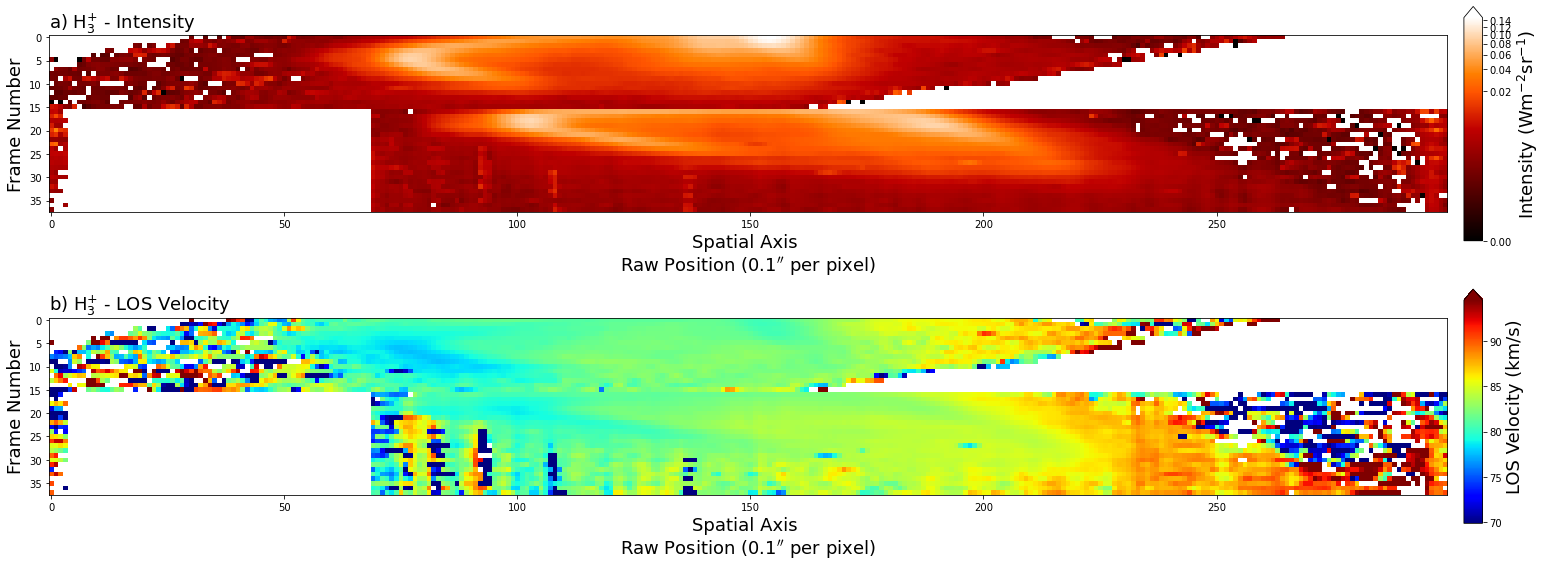

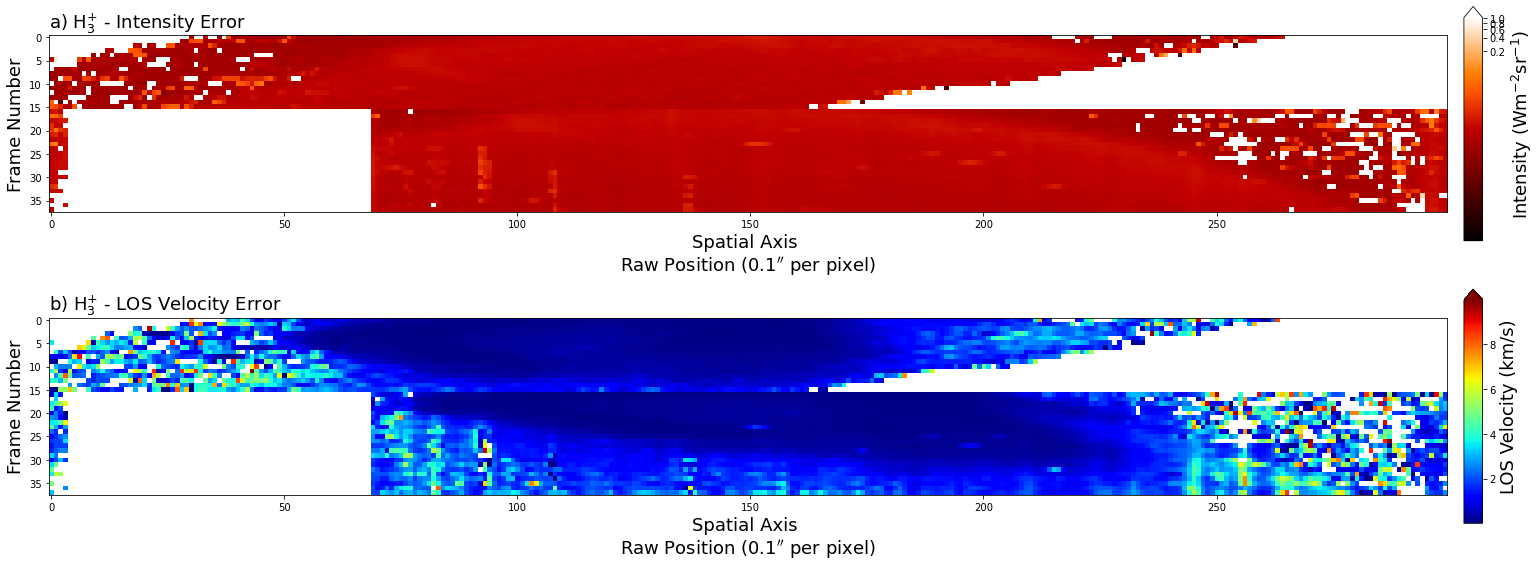

In [3]:
# data
h3p_a0 = np.vstack((h3p_a0_map))
h3p_a1 = np.vstack((h3p_a1_map))
h3p_fwhm = np.vstack((h3p_fwhm_map))

h3p_int = h3p_a0*h3p_fwhm
h3p_los = h3p_a1/R*3e5*np.cos(3.098*np.pi/180)

h3p_int1 = np.roll(h3p_int[:6], 25, axis=1)
h3p_int2 = np.roll(h3p_int[6:11], 24, axis=1)
h3p_int3 = np.roll(h3p_int[11:16], 33, axis=1)
h3p_int4 = np.roll(h3p_int[16:27], -14, axis=1)
h3p_int5 = np.roll(h3p_int[27:], -14, axis=1)
h3p_int_shifted = np.vstack((h3p_int1, h3p_int2, h3p_int3, h3p_int4, h3p_int5))

for i in range(16):
    h3p_int_shifted[i,:] = scipy.ndimage.shift(h3p_int_shifted[i,:], i*6, order=3)

    
h3p_los1 = np.roll(h3p_los[:6], 25, axis=1)
h3p_los2 = np.roll(h3p_los[6:11], 24, axis=1)
h3p_los3 = np.roll(h3p_los[11:16], 33, axis=1)
h3p_los4 = np.roll(h3p_los[16:27], -14, axis=1)
h3p_los5 = np.roll(h3p_los[27:], -14, axis=1)
h3p_los_shifted = np.vstack((h3p_los1, h3p_los2, h3p_los3, h3p_los4, h3p_los5))

for i in range(16):
    h3p_los_shifted[i,:] = scipy.ndimage.shift(h3p_los_shifted[i,:], i*6, order=3)

h3p_int_shifted = np.flip(h3p_int_shifted, 1)
h3p_los_shifted = np.flip(h3p_los_shifted, 1)

# error
h3p_a0_error = np.vstack((h3p_a0_map_error))
h3p_a1_error = np.vstack((h3p_a1_map_error))
h3p_fwhm_error = np.vstack((h3p_fwhm_map_error))

h3p_a0_error[h3p_a0_error==0]=1e10
h3p_a1_error[h3p_a1_error==0]=1e10
h3p_fwhm_error[h3p_fwhm_error==0]=1e10

h3p_a0[h3p_a0==0]=1e10
h3p_a1[h3p_a1==0]=1e10
h3p_fwhm[h3p_fwhm==0]=1e10

h3p_int_error = h3p_int*np.sqrt((h3p_a0_error/h3p_a0)**2+(h3p_fwhm_error/h3p_fwhm)**2)
h3p_los_error = h3p_a1_error/R*3e5*np.cos(3.098*np.pi/180)

h3p_int1_error = np.roll(h3p_int_error[:6], 25, axis=1)
h3p_int2_error = np.roll(h3p_int_error[6:11], 24, axis=1)
h3p_int3_error = np.roll(h3p_int_error[11:16], 33, axis=1)
h3p_int4_error = np.roll(h3p_int_error[16:27], -14, axis=1)
h3p_int5_error = np.roll(h3p_int_error[27:], -14, axis=1)
h3p_int_shifted_error = np.vstack((h3p_int1_error, h3p_int2_error, h3p_int3_error, h3p_int4_error, h3p_int5_error))

for i in range(16):
    h3p_int_shifted_error[i,:] = scipy.ndimage.shift(h3p_int_shifted_error[i,:], i*6, order=3)

h3p_los1_error = np.roll(h3p_los_error[:6], 25, axis=1)
h3p_los2_error = np.roll(h3p_los_error[6:11], 24, axis=1)
h3p_los3_error = np.roll(h3p_los_error[11:16], 33, axis=1)
h3p_los4_error = np.roll(h3p_los_error[16:27], -14, axis=1)
h3p_los5_error = np.roll(h3p_los_error[27:], -14, axis=1)
h3p_los_shifted_error = np.vstack((h3p_los1_error, h3p_los2_error, h3p_los3_error, h3p_los4_error, h3p_los5_error))

for i in range(16):
    h3p_los_shifted_error[i,:] = scipy.ndimage.shift(h3p_los_shifted_error[i,:], i*6, order=3)
    
h3p_int_shifted_error[h3p_int_shifted_error>=10] = np.nan
h3p_int_shifted_error[h3p_int_shifted_error<=1e-6] = np.nan
h3p_los_shifted_error[h3p_los_shifted_error>=10] = np.nan
h3p_los_shifted_error[h3p_los_shifted_error<=1e-6] = np.nan

h3p_int_shifted_error = np.flip(h3p_int_shifted_error, 1)
h3p_los_shifted_error = np.flip(h3p_los_shifted_error, 1)

h3p_int_shifted[np.isnan(h3p_int_shifted_error)] = np.nan
h3p_los_shifted[np.isnan(h3p_los_shifted_error)] = np.nan

# plot
fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(211)
plt.imshow(h3p_int_shifted, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('a) H$_3^{+}$ - Intensity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

fig.add_subplot(212)
plt.imshow(h3p_los_shifted, cmap='jet')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('b) H$_3^{+}$ - LOS Velocity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='LOS Velocity (km/s)',size=18)

fig = plt.figure(figsize=(24,8), tight_layout=True)

fig.add_subplot(211)
# colMap = cm.gist_heat
# colMap.set_bad(color='white')
plt.imshow(h3p_int_shifted_error, cmap='gist_heat', norm=colors.PowerNorm(gamma=0.1))
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('a) H$_3^{+}$ - Intensity Error', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

fig.add_subplot(212)
plt.imshow(h3p_los_shifted_error, cmap='jet')
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
plt.title('b) H$_3^{+}$ - LOS Velocity Error', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='LOS Velocity (km/s)',size=18)

In [4]:
hdu1 = fits.PrimaryHDU(h3p_int_shifted)
hdu1.writeto('h3p_int_shifted.fits', overwrite=True)

hdu2 = fits.PrimaryHDU(h3p_los_shifted)
hdu2.writeto('h3p_los_shifted.fits', overwrite=True)

hdu3 = fits.PrimaryHDU(h3p_int_shifted_error)
hdu3.writeto('h3p_int_shifted_error.fits', overwrite=True)

hdu4 = fits.PrimaryHDU(h3p_los_shifted_error)
hdu4.writeto('h3p_los_shifted_error.fits', overwrite=True)